### This notebook gives a conversion of code from R to Python. The R code is taken from the Case Study A in the book Market Segementation Analysis by Sarah Dolnicar, Bettina Grün and Friedrich Leisch. 
The book can be found __[here](https://drive.google.com/file/d/1SIEt4Bp_4R9dcs4saU1DIui1IKWQIW38/view?usp=sharing)__.

In [1]:
import pandas as pd
import numpy as np
import factor_analyzer

In [2]:
mcd = pd.read_csv('datasets\mcdonalds.csv')

In [3]:
mcd.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
mcd.shape

(1453, 15)

In [5]:
mcd.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
md = mcd[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']]
md = md.replace({"Yes":1, "No":0})
md.mean()

yummy         0.552650
convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64

**Around 55% of respondents perceive McDonald's as `yummy`, while only 9% think the food is spicy. Principal components analysis and a perceptual map provide initial insights into how attributes are rated and which tend to be rated similarly. Principal components analysis is not used to reduce variables but to rotate and project data for the perceptual map. Unstandardized data is used because the segmentation variables are binary. Factor-cluster analysis is generally inferior to clustering raw data.**

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(md)

PCA()

In [8]:
std_dev = np.sqrt(pca.explained_variance_)
imp = pd.DataFrame(std_dev)

var_list = []
var_den = 0

for i in range(0,11):
    var_den += imp[0][i]**2

for i in range(0, len(std_dev)):
    var = (imp[0][i]**2) / var_den
    var_list.append(var)

In [9]:
imp["Proportion of Variance"] = var_list
imp.rename(columns={0: 'Standard Deviation'}, inplace=True)

In [10]:
cumuvar = []
cumuvar.append(imp['Proportion of Variance'][0])

#cumuvar.append(cumuvar[0] + imp['Proportion of Variance'][1])
#cumuvar.append(cumuvar[1] + imp['Proportion of Variance'][2])

for i in range(1,11):
    cumuvar.append(cumuvar[i-1] + imp['Proportion of Variance'][i])

imp["Cumulative Proportion"] = cumuvar
imp

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


**The analysis of principal components reveals that the first two components are able to capture approximately 50% of the information present in the segmentation variables. Factor loadings provide an insight into how the original variables are combined to form these principal components. For instance, in the given example, the principal component 2 is majorly influenced by CHEAP and EXPENSIVE, with the highest loadings in absolute terms, indicating that it mainly represents the price dimension. By projecting the data into the principal component space with predict, the grey consumers are rotated and projected into the first two principal components. The factor loadings can be obtained by executing the relevant command.**

In [11]:
print("Components:",pca.components_)
print()
print("Explained Variance:", pca.explained_variance_)
print()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print()
print("Singular Values:", pca.singular_values_)
print()
print("Mean:", pca.mean_)
print()
print("Component:", pca.n_components_)
print()
print("Features:", pca.n_features_)
print()
print("Samples:", pca.n_samples_)
print()
print("Noise Variance:", pca.noise_variance_)
print()
print("Features In:", pca.n_features_in_)
print()
print("Feature Names:", pca.feature_names_in_)

Components: [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.3

C:\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
com = pd.DataFrame(pca.components_)
com = com.T*(-1)
com.head(11)

,0,1,2,3,4,5,6,7,8,9,10
0,0.476933,-0.363790,0.304444,-0.055162,0.307535,-0.170738,0.280519,-0.013041,-0.572403,0.110284,-0.045439
1,0.155332,-0.016414,0.062515,0.142425,-0.277608,0.347830,0.059738,0.113079,0.018465,0.665818,0.541616
2,0.006356,-0.018809,0.037019,-0.197619,-0.070620,0.355087,-0.707637,-0.375934,-0.400280,0.075634,-0.141730
3,-0.116232,0.034094,0.322359,0.354139,0.073405,0.406515,0.385943,-0.589622,0.160512,0.005338,-0.250910
4,-0.304443,0.063839,0.802373,-0.253960,-0.361399,-0.209347,-0.036170,0.138241,0.002847,-0.008707,-0.001642
5,0.108493,0.086972,0.064642,0.097363,-0.107930,0.594632,0.086846,0.627799,-0.166197,-0.239532,-0.339265
6,0.337186,0.610633,0.149310,-0.118958,0.128973,0.103241,0.040449,-0.140060,-0.076069,-0.428087,0.489283
7,0.471514,-0.307318,0.287265,0.002547,0.210899,0.076914,-0.360453,0.072792,0.639086,-0.079184,-0.019552
8,-0.329042,-0.601286,-0.024397,-0.067816,0.003125,0.261342,0.068385,-0.029539,-0.066996,-0.454399,0.490069
9,0.213711,-0.076593,-0.192051,-0.763488,-0.287846,0.178226,0.349616,-0.176303,0.185572,0.038117,-0.157608


In [13]:
print(np.sqrt(pca.explained_variance_))

[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]


**The loadings in principal component analysis show how the original variables are combined to create principal components. These loadings help interpret principal components. For instance, in the example given, the two segmentation variables with the highest loadings for the second principal component are `CHEAP` and `EXPENSIVE`, indicating that this principal component represents the price dimension. Using the `predict` function, we can project the data into the principal component space. In the next step, the data is rotated and projected into the first two principal components. Consumers are represented in grey, and the rotated and projected original segmentation variables are shown as arrows in the plot.**

C:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


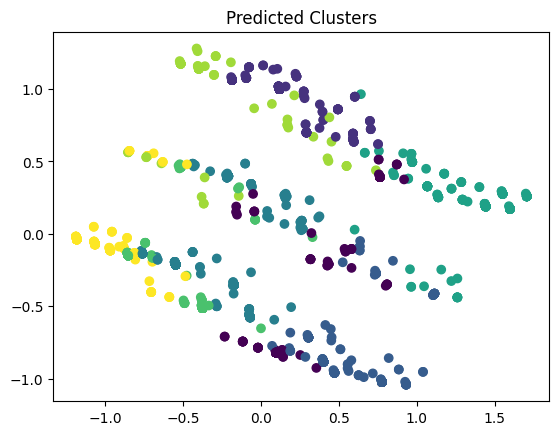

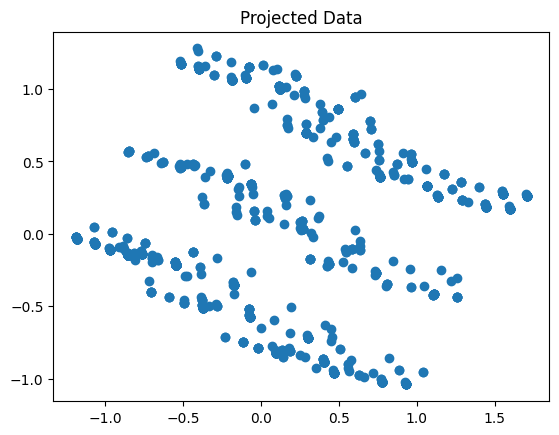

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

transformed_md = pca.fit_transform(md)
km28 = KMeans()
predicted_clusters = km28.fit_predict(transformed_md)

# create a scatter plot of the predicted clusters
plt.scatter(transformed_md[:, 0], transformed_md[:, 1], c=predicted_clusters, cmap='viridis')
plt.title('Predicted Clusters')
plt.show()

# create a scatter plot of the data projected onto the first two principal components
plt.scatter(transformed_md[:, 0], transformed_md[:, 1])
plt.title('Projected Data')
plt.show()

**Above figure presents a perceptual map of McDonald's attributes based on consumer evaluations. The attributes of CHEAP and EXPENSIVE are crucial factors in the evaluation of McDonald's, and are independently assessed. FATTENING, DISGUSTING, and GREASY align with negative perceptions, while FAST, CONVENIENT, HEALTHY, TASTY, and YUMMY align with positive perceptions. The map indicates that consumers cluster into three groups along the EXPENSIVE versus CHEAP axis. These insights provide valuable information for segment extraction, showing that some attributes strongly relate to each other and that the price dimension may be essential in distinguishing between consumer groups.**

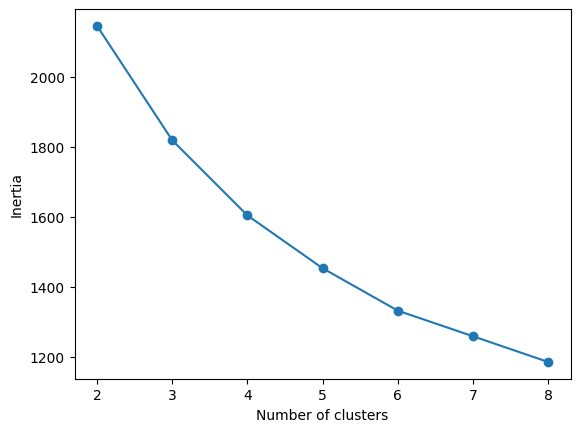

In [15]:
np.random.seed(1234)

# Perform k-means clustering for k = 2 to 8
inertias = []
for k in range(2, 9):
    km28 = KMeans(n_clusters=k, n_init=10, verbose=0)
    km28.fit(md)
    inertias.append(km28.inertia_)

# Find the elbow point
import matplotlib.pyplot as plt
plt.plot(range(2, 9), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**The above plot does not show a clear elbow that would indicate a good number of market segments to extract. The sum of distances within market segments decreases slowly as the number of segments increases, but there is no point where the drop in the sum of distances is significant. This makes it difficult to determine a suitable number of segments using this approach.**

**Another method to identify a good number of segments is stability-based data structure analysis. This approach assesses the stability of segmentation solutions across repeated calculations and determines whether the market segments occur naturally in the data or if they have to be artificially constructed. Using an unstable, random solution for market segmentation would provide little confidence to McDonald's management for investing resources in a market segmentation strategy. Therefore, assessing the stability of segmentation solutions across repeated calculations ensures that only stable solutions are used for market segmentation.**

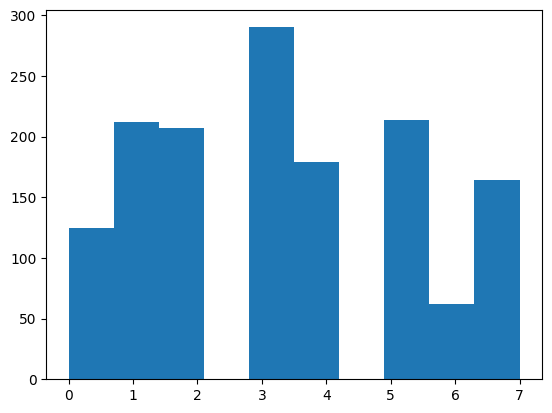

In [16]:
plt.hist(predicted_clusters)
plt.show()